<p style="font-size:20px">You may need to install <b>tqdm</b> and <b>cv2</b>. Simply do <b>conda install tqdm</b> and <b>conda install cv2</b> in your virtual environment. You are also free to use other tools to fetch the image files and resize them.</p>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# from random import shuffle
from tqdm import tqdm
import pickle
import os
import cv2
import timeit


In [16]:
from sklearn import utils

<p style="font-size:20px">In Problem 4a, you will preprocess the dogs and cats data and save them into "Pickle" files for later use.

In [17]:
train_dir = "C:\\Users\\ebish\\PracticalIntroductionNN\\train"
test_dir =  "C:\\Users\\ebish\\PracticalIntroductionNN\\test1"

<p style="font-size:20px">Step 1: Kaggle does not provide a file that contains the labels. So we need to create labels from the training file.

In [18]:
"""
a function to return the label of a image
input: 
    image
return:
    if the image is cat, return [1,0]
    if the image is dog, return [0,1]
"""
def label_img(img):
    label_img=[]
    #################
    label=img.split('.')[0]
    if label=='cat':
        return [1,0]
    else:
        return [0,1]
    
    #################

In [19]:

directory="C:\\Users\\ebish\\PracticalIntroductionNN\\train"
file='cat.1.jpg'
l=list()
r=list()
path =os.path.join(directory,file)
img=cv2.imread(path)
img_new=cv2.resize(img,(227,227))

l.append(img_new)
r.append(label_img(file))

lshuffled, rshuffled=utils.shuffle(l,r)


In [20]:
np.shape(rshuffled)

(1, 2)

<p style="font-size:20px">Step 2: define a function to fetch all images from the training directory and return a <b>list</b> that every element contains two <b>Numpy array</b>:image and its label.

In [21]:
"""
Hint 1: use tqdm to fetch file
    for file in tqdm(os.listdir(directory)):
        ...

Hint 2: use cv2 to read file
    cv2.imread(path)

Hint 3: use cv2 to resize img
    cv2.resize(img, (size, size))
"""
def create_train_data():
    ###create a list###
    l=list()
    r=list()
    directory="C:\\Users\\ebish\\PracticalIntroductionNN\\train"
    ####for loop to fetch img from directory (hint:use tqdm)###
    for file in tqdm(os.listdir(directory)):
        path =os.path.join(directory,file)
        img=cv2.imread(path)
        img_new=cv2.resize(img,(227,227))
        l.append(img_new)
        r.append(label_img(file))
        ###get label of img###
    lshuffled, rshuffled=utils.shuffle(l,r)
    return lshuffled, rshuffled
        ###use cv2 to read the img and resize the it to (227 x 227)###
        
        ###append the img and label to the list###
        
    ###shuffle training data###
    
    ###return training data###
    

<p style="font-size:20px">Step 3: define a similar function to fetch all test data. You don't need to label them.

In [34]:
def create_test_data():
    directory="C:\\Users\\ebish\\PracticalIntroductionNN\\test1"
    l=list()
    r=list()
    ####for loop to fetch img from directory (hint:use tqdm)###
    for file in tqdm(os.listdir(directory)):
        path =os.path.join(directory,file)
        img=cv2.imread(path)
        img2=cv2.resize(img,(227,227))
        l.append(img2)
        r.append(label_img(file))

    return l, r


<p style="font-size:20px">Step 4: create your train and test data</p>

In [35]:
test_data,test_labels = create_test_data()

100%|██████████| 12500/12500 [02:28<00:00, 84.31it/s] 


In [25]:
train_data, train_y = create_train_data()

100%|██████████| 25000/25000 [02:49<00:00, 147.36it/s]


()

<p style="font-size:20px"> You can visualize the image using plt.imshow()

(12500, 227, 227, 3)


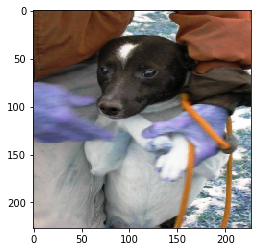

In [23]:
plt.imshow(test_data[0])
print(np.shape(test_data))



In [12]:
subset=test_data[0:100]

(25000, 227, 227, 3)


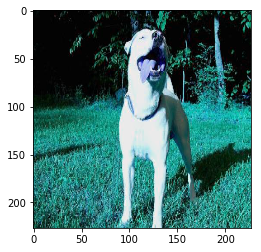

In [26]:
plt.imshow(train_data[2])
print(np.shape(train_data))

In [94]:
print(train_y[2])

[1, 0]


<p style="font-size:20px">Step 5: Reshape all images to have shape (#, 227, 227, 3). Use 500 training data as your validation set.

In [27]:
from sklearn.model_selection import train_test_split



In [28]:
x_train, x_val, y_train, y_val=train_test_split(train_data, train_y,test_size=500)

In [29]:
print('Training data shape:   ',np.shape(x_train))
print('Validation data shape: ',np.shape(x_val))
print('Test data shape:       ' ,np.shape(test_data))

Training data shape:    (24500, 227, 227, 3)
Validation data shape:  (500, 227, 227, 3)
Test data shape:        (12500, 227, 227, 3)


<p style="font-size:20px">Step 6: Save training data, validation data and testing data as Pickle object</p>
<p style="font-size:20px">Note: You can't save all training data into one file because it has several Gigabytes. Separate your data wisely and save them into different files</p>

In [107]:
directory="C:\\Users\\ebish\\PracticalIntroductionNN"
filename='test_data.pkl'
path =os.path.join(directory,filename)
with open(path,'wb') as filename:
    pickle.dump(test_data,filename)


In [108]:
directory="C:\\Users\\ebish\\PracticalIntroductionNN"
filename='x_train_cd.pkl'
path =os.path.join(directory,filename)
with open(path,'wb') as filename:
    pickle.dump(x_train,filename)

In [109]:
directory="C:\\Users\\ebish\\PracticalIntroductionNN"
filename='y_train_cd.pkl'
path =os.path.join(directory,filename)
with open(path,'wb') as filename:
    pickle.dump(y_train,filename)

In [30]:
directory="C:\\Users\\ebish\\PracticalIntroductionNN"
filename='x_val_cd.pkl'
path =os.path.join(directory,filename)
with open(path,'wb') as filename:
    pickle.dump(x_val,filename)

In [31]:
directory="C:\\Users\\ebish\\PracticalIntroductionNN"
filename='y_val_cd.pkl'
path =os.path.join(directory,filename)
with open(path,'wb') as filename:
    pickle.dump(y_val,filename)

In [36]:
directory="C:\\Users\\ebish\\PracticalIntroductionNN"
filename='y_test_cd.pkl'
path =os.path.join(directory,filename)
with open(path,'wb') as filename:
    pickle.dump(test_labels,filename)